In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
sys.path.insert(0 ,'../granger-causality')

import seaborn as sns

sns.set(
    style="whitegrid", font_scale=1.2, context="talk",
    palette=sns.color_palette("bright"), color_codes=False)
# consider using TrueType fonts if submitting to a conference
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (8, 6)

PLOT_PATH = '../plots/'
MARKERS = ['o', 'v', 's', 'P', 'p', '*', 'H', 'X', 'D']

In [2]:
from utils.utils import get_best_runs

In [3]:
class NameSpace(object):
    def __init__(self, adict):
        self.__dict__.update(adict)

In [4]:
def get_exps(run_id, train_metric, metric, checkpoint_dir, dataset, model_s):
    exps = []
    for model in model_s:
        exp = {
            'model': model,
            'dataset': dataset, 
            'run_id': run_id,
            'train_metric': train_metric,
            'metric': metric,
            'checkpoint_dir': checkpoint_dir            
        }
        exp = NameSpace(exp)
        exps.append(exp)
    return exps

def transf(arr, op):
#     return str(op(arr))
    return str(round(100 * op(arr), 1))

### Area under curve for the ROC (True Positive vs. False Positive) and PR (Precision vs. Recall) 

In [132]:
run_id = 'simulations_long'
train_metric = False
metric = 'loss'
# obj_s = ['roc_auc', 'pr_auc']
obj_s = ['pr_auc', 'loss']
# obj_s = ['loss']

checkpoint_dir = '../check_points'

model_s = ['var', 'lekvar', "cmlp", "cmlpwf", "ctlstm", "ctlstmwf", 
           'cmlp_s', 'cmlpwf_s', 'ctlstm_s', 'ctlstmwf_s']
# dataset_s = ['var_p_10_T_100_lag_3_d_0_k_none', 'var_p_10_T_200_lag_3_d_0_k_none', 'var_p_10_T_1000_lag_3_d_0_k_none']
# dataset_s = ['lorenz_p_20_F_20_T_250', 'lorenz_p_20_F_20_T_750', 'lorenz_p_20_F_20_T_1500']
dataset_s = ['InSilicoSize100-Ecoli1', 'InSilicoSize100-Ecoli2', 'InSilicoSize100-Yeast1', 'InSilicoSize100-Yeast2', 'InSilicoSize100-Yeast3']

legend = ['VAR', 'LeKVAR', 'cMLP', 'cMLPwF', 'cLSTM', 'cLSTMwF', 
          'cMLP_s', 'cMLPwF_s', 'cLSTM_s', 'cLSTMwF_s']

exps = get_exps(run_id, train_metric, metric, checkpoint_dir, dataset_s[0], model_s)

In [133]:
data = {}
for dataset in dataset_s:
    exps = get_exps(run_id, train_metric, metric, checkpoint_dir, dataset, model_s)
    for exp in exps:
        runs = get_best_runs(exp)
        val_s = {obj: [run[obj] for run in runs] for obj in obj_s}
        data[dataset, exp.model] = {obj: transf(val_s[obj], np.mean) + ' ± ' + transf(val_s[obj], np.std) for obj in obj_s}


Method: var best_params: lr=0.01-gc_pen=0.0001
Method: lekvar best_params: lr=0.01-gc_pen=0.0001
Method: cmlp best_params: lr=0.01-gc_pen=1e-06
Method: cmlpwf best_params: lr=0.01-gc_pen=1e-07
Method: ctlstm best_params: lr=0.01-gc_pen=1e-06
Method: ctlstmwf best_params: lr=0.01-gc_pen=1e-07
Method: cmlp_s best_params: lr=0.01-gc_pen=1e-05
Method: cmlpwf_s best_params: lr=0.01-gc_pen=1e-06
Method: ctlstm_s best_params: lr=0.01-gc_pen=1e-05
Method: ctlstmwf_s best_params: lr=0.01-gc_pen=1e-07
Method: var best_params: lr=0.01-gc_pen=0.0001
Method: lekvar best_params: lr=0.01-gc_pen=0.0001
Method: cmlp best_params: lr=0.01-gc_pen=1e-06
Method: cmlpwf best_params: lr=0.01-gc_pen=1e-06
Method: ctlstm best_params: lr=0.01-gc_pen=1e-06
Method: ctlstmwf best_params: lr=0.01-gc_pen=1e-07
Method: cmlp_s best_params: lr=0.01-gc_pen=1e-05
Method: cmlpwf_s best_params: lr=0.01-gc_pen=1e-07
Method: ctlstm_s best_params: lr=0.01-gc_pen=1e-05
Method: ctlstmwf_s best_params: lr=0.01-gc_pen=1e-07
Method

In [134]:
pd.DataFrame(data).T

pr_auc       loss
InSilicoSize100-Ecoli1 var         29.2 ± 0.4  0.8 ± 0.0
                       lekvar       2.5 ± 0.8  1.0 ± 0.0
                       cmlp        38.5 ± 1.4  0.7 ± 0.0
                       cmlpwf      35.7 ± 0.2  0.7 ± 0.0
                       ctlstm      30.8 ± 0.4  0.7 ± 0.0
                       ctlstmwf    22.7 ± 3.0  0.7 ± 0.0
                       cmlp_s      25.2 ± 0.1  0.8 ± 0.0
                       cmlpwf_s    46.7 ± 1.0  0.6 ± 0.0
                       ctlstm_s    23.7 ± 0.7  0.7 ± 0.0
                       ctlstmwf_s  18.9 ± 0.4  0.7 ± 0.0
InSilicoSize100-Ecoli2 var         29.8 ± 1.2  0.8 ± 0.0
                       lekvar       3.5 ± 2.1  0.9 ± 0.0
                       cmlp        37.9 ± 0.6  0.7 ± 0.0
                       cmlpwf      17.0 ± 1.7  0.8 ± 0.0
                       ctlstm      35.6 ± 1.3  0.7 ± 0.0
                       ctlstmwf    22.0 ± 2.6  0.7 ± 0.0
                       cmlp_s      23.1 ± 0.9  0.8 ± 0.0
                       cmlpwf_s    42.3 ± 1.5  0.7 ± 0.0
                       ctlstm_s    23.4 ± 0.8  0.7 ± 0.0
                       ctlstmwf_s  17.7 ± 2.4  0.7 ± 0.0
InSilicoSize100-Yeast1 var         27.6 ± 0.9  0.9 ± 0.0
                       lekvar      11.1 ± 5.0  1.0 ± 0.0
                       cmlp        39.4 ± 1.6  0.7 ± 0.0
                       cmlpwf      37.5 ± 1.1  0.7 ± 0.0
                       ctlstm      31.6 ± 0.9  0.7 ± 0.0
                       ctlstmwf    25.7 ± 0.5  0.7 ± 0.0
                       cmlp_s      45.6 ± 0.8  0.7 ± 0.0
                       cmlpwf_s    42.2 ± 0.9  0.7 ± 0.0
                       ctlstm_s    32.1 ± 0.4  0.7 ± 0.0
                       ctlstmwf_s  23.7 ± 1.6  0.7 ± 0.0
InSilicoSize100-Yeast2 var         20.5 ± 0.4  0.8 ± 0.0
                       lekvar       4.9 ± 0.9  0.9 ± 0.0
                       cmlp        24.1 ± 0.2  0.8 ± 0.0
                       cmlpwf      25.0 ± 1.5  0.7 ± 0.0
                       ctlstm      23.0 ± 1.1  0.7 ± 0.0
                       ctlstmwf    18.3 ± 0.6  0.7 ± 0.0
                       cmlp_s      30.3 ± 0.3  0.7 ± 0.0
                       cmlpwf_s    27.4 ± 0.7  0.7 ± 0.0
                       ctlstm_s    19.5 ± 0.7  0.7 ± 0.0
                       ctlstmwf_s  15.7 ± 0.4  0.7 ± 0.0
InSilicoSize100-Yeast3 var         17.6 ± 0.0  0.8 ± 0.0
                       lekvar      11.3 ± 4.8  0.9 ± 0.0
                       cmlp        21.8 ± 0.5  0.7 ± 0.0
                       cmlpwf      21.1 ± 0.2  0.7 ± 0.0
                       ctlstm      21.2 ± 1.0  0.7 ± 0.0
                       ctlstmwf    17.2 ± 0.5  0.7 ± 0.0
                       cmlp_s      24.9 ± 0.5  0.7 ± 0.0
                       cmlpwf_s    23.3 ± 0.4  0.7 ± 0.0
                       ctlstm_s    20.2 ± 0.3  0.7 ± 0.0
                       ctlstmwf_s  17.6 ± 0.4  0.7 ± 0.0

In [9]:
from sklearn import metrics
from data_funcs.data_loader import load_data

data_path = '../data/'

In [33]:
def remove_diagonal(A):
#     return A
    return A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)



def auc_roc_pr(GC_1, GC_2):
    fpr, tpr, _ = metrics.roc_curve(remove_diagonal(GC_1).flatten(),
                                    remove_diagonal(GC_2).flatten())
    auc_roc = metrics.auc(fpr, tpr)

    auc_pr = metrics.average_precision_score(remove_diagonal(GC_1).flatten(),
                                             remove_diagonal(GC_2).flatten())
    return auc_roc, auc_pr

In [34]:
data = {}
for dataset in dataset_s:
    exps = get_exps(run_id, train_metric, metric, checkpoint_dir, dataset, model_s)
    for exp in exps:
        _, _, GC_true = load_data(data_path, exp.dataset, 5)
        val_s = {'roc_auc': [],	'pr_auc': []}
        runs = get_best_runs(exp)
        for run in runs:
            auc_roc, auc_pr = auc_roc_pr(
                GC_true, np.array(run['GC']).reshape(-1, int(np.sqrt(len(run['GC'])))))
            val_s['roc_auc'].append(auc_roc)
            val_s['pr_auc'].append(auc_pr)
        data[dataset, exp.model] = {obj: transf(val_s[obj], np.mean) + ' ± ' + transf(val_s[obj], np.std) for obj in obj_s}


Method: var best_params: lr=0.01-gc_pen=1e-05
Method: lekvar best_params: lr=0.01-gc_pen=1e-05
Method: cmlp best_params: lr=0.01-gc_pen=1e-05
Method: cmlpwf best_params: lr=0.01-gc_pen=1e-06
Method: ctlstm best_params: lr=0.01-gc_pen=1e-06
Method: ctlstmwf best_params: lr=0.01-gc_pen=1e-06
Method: cmlp_s best_params: lr=0.01-gc_pen=1e-05
Method: cmlpwf_s best_params: lr=0.01-gc_pen=1e-05
Method: lekvar_s best_params: lr=0.01-gc_pen=1e-05
Method: ctlstm_s best_params: lr=0.01-gc_pen=1e-05
Method: ctlstmwf_s best_params: lr=0.1-gc_pen=1e-06
Method: var best_params: lr=0.01-gc_pen=1e-05
Method: lekvar best_params: lr=0.01-gc_pen=1e-05
Method: cmlp best_params: lr=0.01-gc_pen=1e-06
Method: cmlpwf best_params: lr=0.01-gc_pen=1e-06
Method: ctlstm best_params: lr=0.01-gc_pen=1e-06
Method: ctlstmwf best_params: lr=0.01-gc_pen=1e-06
Method: cmlp_s best_params: lr=0.01-gc_pen=1e-05
Method: cmlpwf_s best_params: lr=0.01-gc_pen=1e-05
Method: lekvar_s best_params: lr=0.01-gc_pen=1e-05
Method: ctlst

In [35]:
pd.DataFrame(data).T

roc_auc     pr_auc
InSilicoSize100-Ecoli1 var         66.3 ± 0.0  6.6 ± 0.0
                       lekvar      45.9 ± 0.0  2.1 ± 0.0
                       cmlp        66.3 ± 0.0  4.3 ± 0.0
                       cmlpwf      59.7 ± 0.0  2.9 ± 0.0
                       ctlstm      63.6 ± 0.0  4.2 ± 0.0
                       ctlstmwf    60.7 ± 0.0  2.9 ± 0.0
                       cmlp_s      61.3 ± 0.0  4.1 ± 0.0
                       cmlpwf_s    59.2 ± 0.0  2.9 ± 0.0
                       lekvar_s    45.9 ± 0.0  2.1 ± 0.0
                       ctlstm_s    63.4 ± 0.0  3.0 ± 0.0
                       ctlstmwf_s  53.2 ± 0.0  1.9 ± 0.0
InSilicoSize100-Ecoli2 var         63.2 ± 0.0  3.3 ± 0.0
                       lekvar      47.4 ± 0.0  2.8 ± 0.0
                       cmlp        60.2 ± 0.0  2.7 ± 0.0
                       cmlpwf      58.3 ± 0.0  2.4 ± 0.0
                       ctlstm      63.0 ± 0.0  2.9 ± 0.0
                       ctlstmwf    60.1 ± 0.0  1.8 ± 0.0
                       cmlp_s      62.0 ± 0.0  3.3 ± 0.0
                       cmlpwf_s    56.5 ± 0.0  1.7 ± 0.0
                       lekvar_s    47.4 ± 0.0  2.8 ± 0.0
                       ctlstm_s    60.7 ± 0.0  3.4 ± 0.0
                       ctlstmwf_s  48.0 ± 0.0  3.1 ± 0.0
InSilicoSize100-Yeast1 var         59.9 ± 0.0  8.2 ± 0.0
                       lekvar      53.5 ± 0.0  4.5 ± 0.0
                       cmlp        62.9 ± 0.0  8.8 ± 0.0
                       cmlpwf      54.9 ± 0.0  3.5 ± 0.0
                       ctlstm      57.7 ± 0.0  5.0 ± 0.0
                       ctlstmwf    54.3 ± 0.0  3.8 ± 0.0
                       cmlp_s      58.8 ± 0.0  7.3 ± 0.0
                       cmlpwf_s    58.2 ± 0.0  6.2 ± 0.0
                       lekvar_s    53.5 ± 0.0  4.5 ± 0.0
                       ctlstm_s    55.7 ± 0.0  3.4 ± 0.0
                       ctlstmwf_s  51.1 ± 0.0  5.2 ± 0.0
InSilicoSize100-Yeast2 var         57.1 ± 0.0  7.7 ± 0.0
                       lekvar      49.3 ± 0.0  5.2 ± 0.0
                       cmlp        56.4 ± 0.0  7.5 ± 0.0
                       cmlpwf      53.9 ± 0.0  6.7 ± 0.0
                       ctlstm      54.6 ± 0.0  4.9 ± 0.0
                       ctlstmwf    52.3 ± 0.0  4.5 ± 0.0
                       cmlp_s      53.2 ± 0.0  7.4 ± 0.0
                       cmlpwf_s    54.1 ± 0.0  6.0 ± 0.0
                       lekvar_s    49.3 ± 0.0  5.2 ± 0.0
                       ctlstm_s    53.6 ± 0.0  5.0 ± 0.0
                       ctlstmwf_s  52.7 ± 0.0  5.5 ± 0.0
InSilicoSize100-Yeast3 var         52.2 ± 0.0  7.8 ± 0.0
                       lekvar      50.9 ± 0.0  6.6 ± 0.0
                       cmlp        53.4 ± 0.0  7.7 ± 0.0
                       cmlpwf      52.6 ± 0.0  6.8 ± 0.0
                       ctlstm      51.9 ± 0.0  6.6 ± 0.0
                       ctlstmwf    49.0 ± 0.0  5.9 ± 0.0
                       cmlp_s      52.6 ± 0.0  7.0 ± 0.0
                       cmlpwf_s    52.6 ± 0.0  7.1 ± 0.0
                       lekvar_s    50.9 ± 0.0  6.6 ± 0.0
                       ctlstm_s    52.6 ± 0.0  6.2 ± 0.0
                       ctlstmwf_s  50.8 ± 0.0  6.1 ± 0.0

In [32]:
pd.DataFrame(data).T

roc_auc      pr_auc
InSilicoSize100-Ecoli1 var         78.4 ± 0.0  38.3 ± 0.0
                       lekvar      64.2 ± 0.0  16.0 ± 0.0
                       cmlp        78.5 ± 0.0  42.8 ± 0.0
                       cmlpwf      74.5 ± 0.0  33.9 ± 0.0
                       ctlstm      79.0 ± 0.0  36.5 ± 0.0
                       ctlstmwf    72.6 ± 0.0  20.0 ± 0.0
                       cmlp_s      75.6 ± 0.0  38.5 ± 0.0
                       cmlpwf_s    66.1 ± 0.0  11.8 ± 0.0
                       lekvar_s    64.2 ± 0.0  16.0 ± 0.0
                       ctlstm_s    77.8 ± 0.0  38.8 ± 0.0
                       ctlstmwf_s  68.0 ± 0.0  27.6 ± 0.0
InSilicoSize100-Ecoli2 var         78.0 ± 0.0  39.5 ± 0.0
                       lekvar      65.9 ± 0.0  14.2 ± 0.0
                       cmlp        78.1 ± 0.0  45.0 ± 0.0
                       cmlpwf      74.4 ± 0.0  37.4 ± 0.0
                       ctlstm      79.6 ± 0.0  42.7 ± 0.0
                       ctlstmwf    71.4 ± 0.0  20.9 ± 0.0
                       cmlp_s      77.1 ± 0.0  42.4 ± 0.0
                       cmlpwf_s    66.0 ± 0.0  15.0 ± 0.0
                       lekvar_s    65.9 ± 0.0  14.2 ± 0.0
                       ctlstm_s    77.6 ± 0.0  46.8 ± 0.0
                       ctlstmwf_s  67.2 ± 0.0  36.9 ± 0.0
InSilicoSize100-Yeast1 var         73.5 ± 0.0  38.7 ± 0.0
                       lekvar      67.7 ± 0.0  21.7 ± 0.0
                       cmlp        74.7 ± 0.0  42.0 ± 0.0
                       cmlpwf      68.6 ± 0.0  31.8 ± 0.0
                       ctlstm      72.6 ± 0.0  34.9 ± 0.0
                       ctlstmwf    67.7 ± 0.0  25.4 ± 0.0
                       cmlp_s      73.5 ± 0.0  41.3 ± 0.0
                       cmlpwf_s    69.8 ± 0.0  32.1 ± 0.0
                       lekvar_s    67.7 ± 0.0  21.7 ± 0.0
                       ctlstm_s    70.8 ± 0.0  37.1 ± 0.0
                       ctlstmwf_s  64.9 ± 0.0  31.5 ± 0.0
InSilicoSize100-Yeast2 var         65.1 ± 0.0  26.2 ± 0.0
                       lekvar      57.9 ± 0.0  14.8 ± 0.0
                       cmlp        64.9 ± 0.0  28.3 ± 0.0
                       cmlpwf      61.3 ± 0.0  24.0 ± 0.0
                       ctlstm      63.6 ± 0.0  23.1 ± 0.0
                       ctlstmwf    59.9 ± 0.0  16.1 ± 0.0
                       cmlp_s      62.0 ± 0.0  27.7 ± 0.0
                       cmlpwf_s    60.9 ± 0.0  22.6 ± 0.0
                       lekvar_s    57.9 ± 0.0  14.8 ± 0.0
                       ctlstm_s    62.5 ± 0.0  25.8 ± 0.0
                       ctlstmwf_s  60.2 ± 0.0  22.1 ± 0.0
InSilicoSize100-Yeast3 var         58.8 ± 0.0  22.3 ± 0.0
                       lekvar      56.6 ± 0.0  14.6 ± 0.0
                       cmlp        60.1 ± 0.0  23.4 ± 0.0
                       cmlpwf      58.5 ± 0.0  20.7 ± 0.0
                       ctlstm      59.0 ± 0.0  21.6 ± 0.0
                       ctlstmwf    54.9 ± 0.0  15.7 ± 0.0
                       cmlp_s      59.6 ± 0.0  23.6 ± 0.0
                       cmlpwf_s    58.3 ± 0.0  20.4 ± 0.0
                       lekvar_s    56.6 ± 0.0  14.6 ± 0.0
                       ctlstm_s    59.2 ± 0.0  21.8 ± 0.0
                       ctlstmwf_s  57.0 ± 0.0  19.1 ± 0.0

### Capturing lags

In [115]:
run_id = 'simulations'
train_metric = False
metric = 'loss'
obj_s = ['roc_auc', 'pr_auc']

checkpoint_dir = '../check_points'


model_s = ["ctlstmwf"]
dataset_s = ['var_p_10_T_100_lag_3_d_2_k_none', 'var_p_10_T_200_lag_3_d_2_k_none', 'var_p_10_T_1000_lag_3_d_2_k_none',
             'var_p_10_T_100_lag_3_d_0_k_none', 'var_p_10_T_200_lag_3_d_0_k_none', 'var_p_10_T_1000_lag_3_d_0_k_none']
legend = ['cLSTMwF']

exps = get_exps(run_id, train_metric, metric, checkpoint_dir, dataset_s[0], model_s)

Method: ctlstmwf best_params: lr=0.001-gc_pen=1e-05


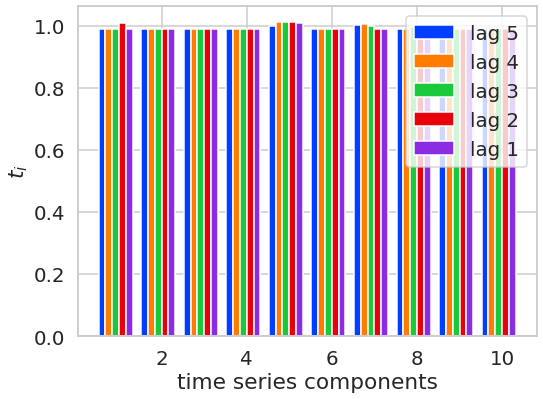

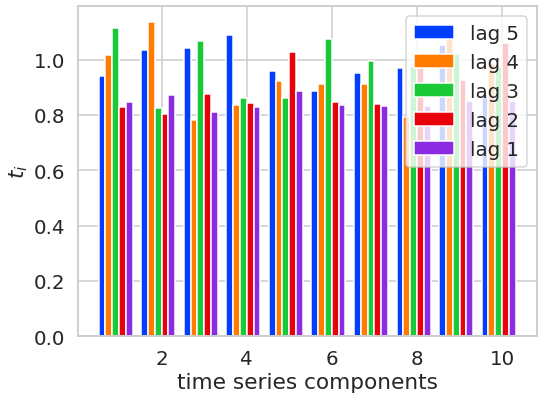

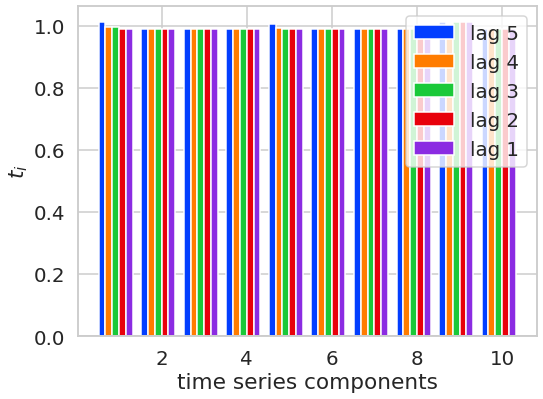

Method: ctlstmwf best_params: lr=0.001-gc_pen=1e-05


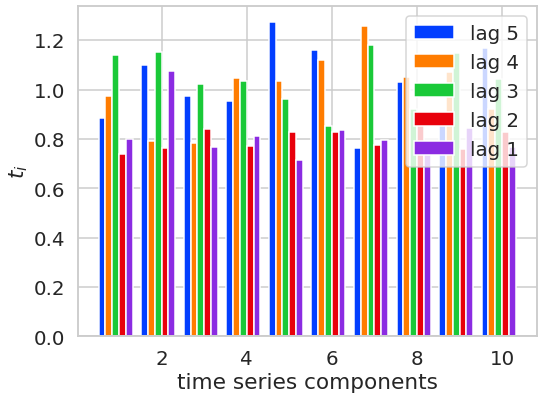

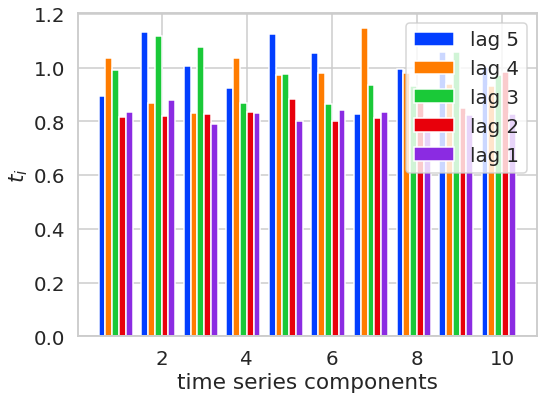

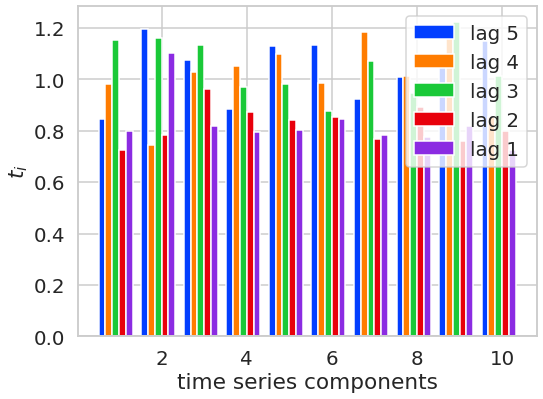

Method: ctlstmwf best_params: lr=0.01-gc_pen=0.0001


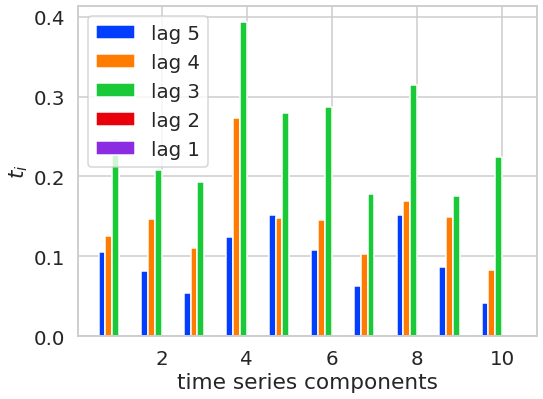

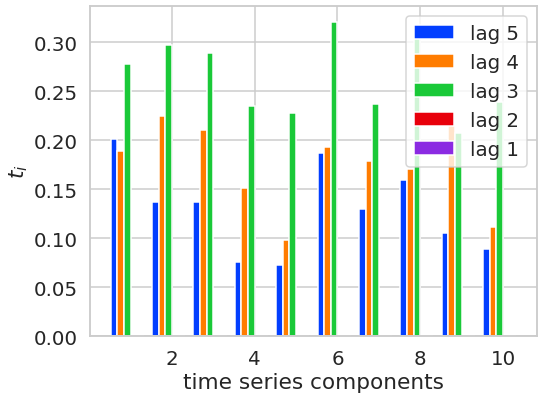

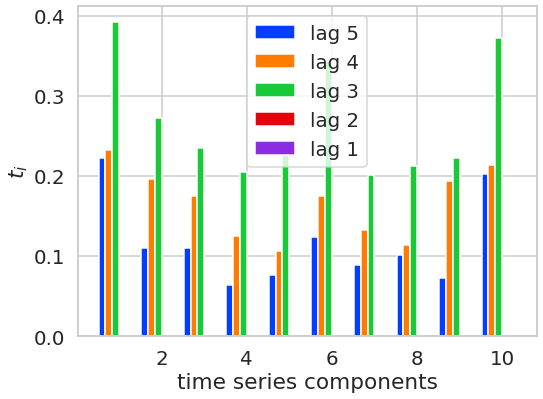

Method: ctlstmwf best_params: lr=0.001-gc_pen=1e-05


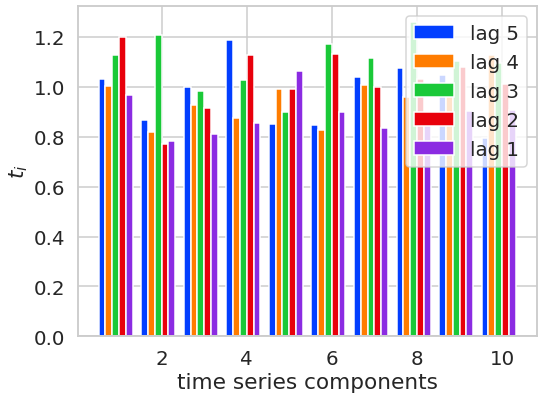

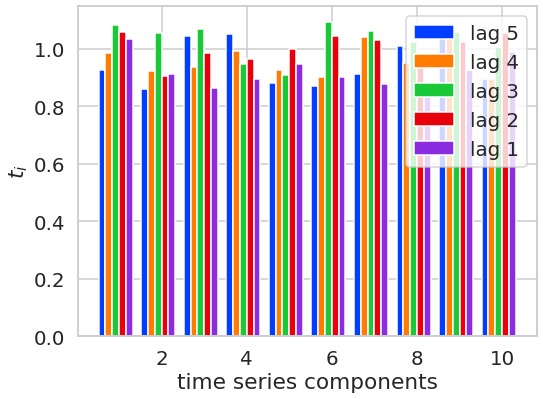

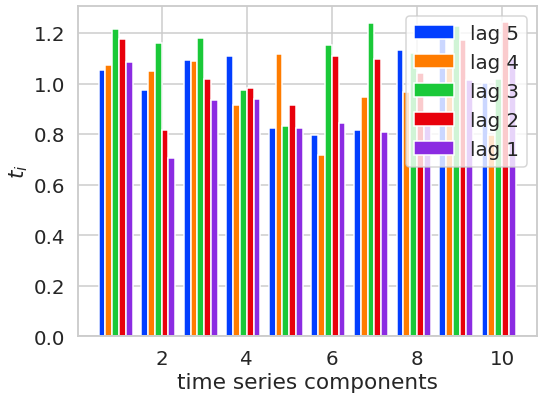

Method: ctlstmwf best_params: lr=0.01-gc_pen=0.0001


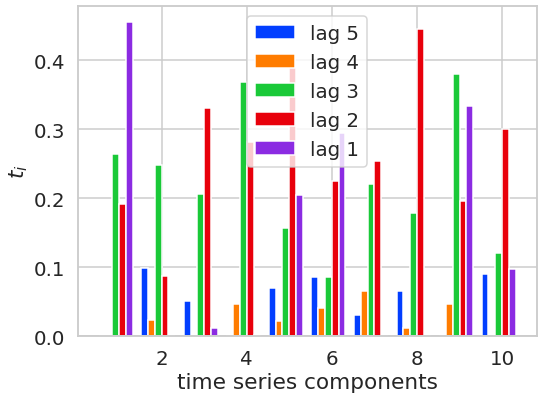

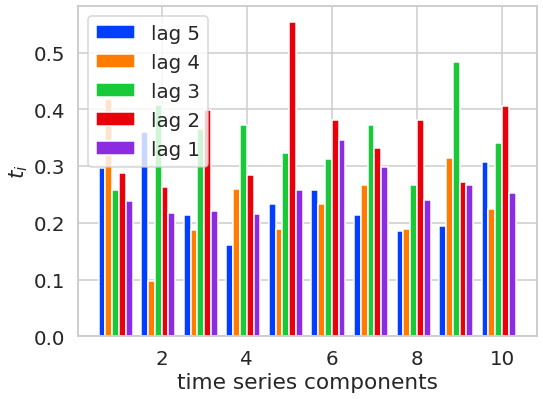

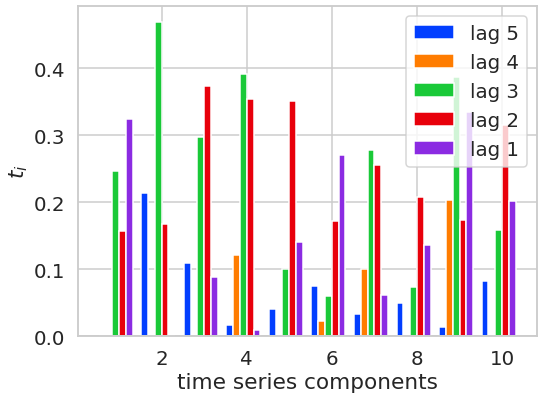

Method: ctlstmwf best_params: lr=0.01-gc_pen=0.0001


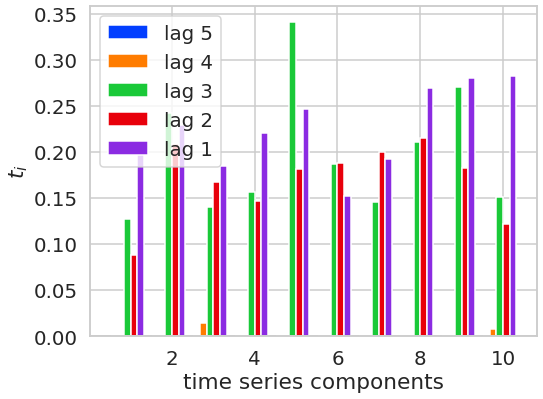

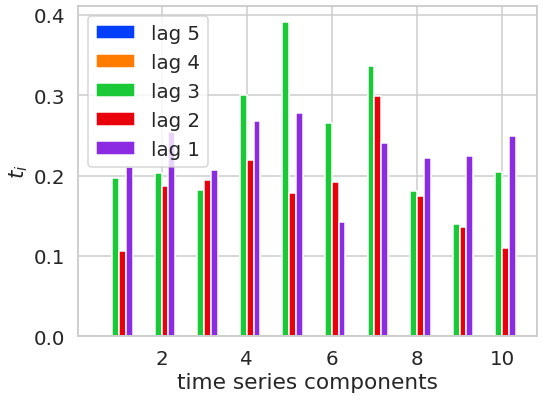

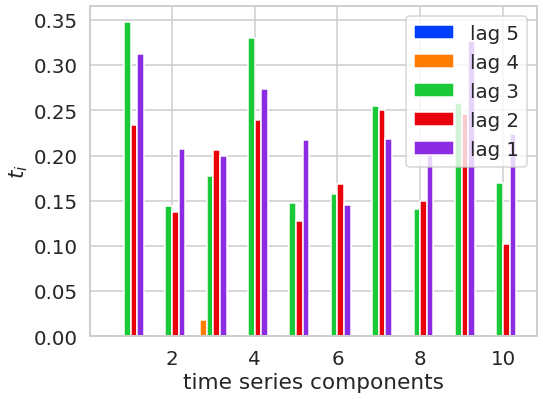

In [116]:
data = {}
for dataset in dataset_s:
    exps = get_exps(run_id, train_metric, metric, checkpoint_dir, dataset, model_s)
    for exp in exps:
        runs = get_best_runs(exp)
        for j, run in enumerate(runs):
            GC_full = np.array(run['GC_full'])
            GC_time =  GC_full.reshape(10, 5).T
            lags = GC_time.shape[0]
            width = 0.8 / lags
            for i in range(lags):
                plt.bar(np.arange(1,11) - 0.4 + i * width, GC_full.reshape(10, 5).T[i], width=width)
            plt.legend([f'lag {lags-i}' for i in range(lags)])
            plt.xlabel(r'time series components')
            plt.ylabel(r'$t_i$')
            plt.tight_layout()
            plt.savefig(f'{PLOT_PATH}_{exp.dataset}_{exp.model}_run_{j}_lags.pdf')
            plt.show()


In [10]:
# (GC.sum(axis=0) > 0).astype(int)


In [11]:
exp.dataset
GC_full.reshape(10, 5)[0]

array([9.49972793e-02, 8.59051496e-02, 1.53450549e-01, 2.23173101e-05,
       1.49615687e-06])

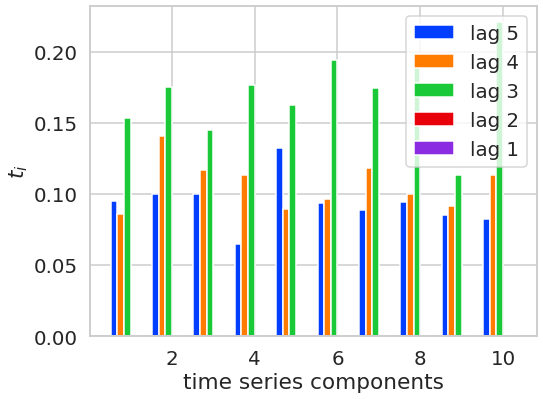

In [13]:
GC_time =  GC_full.reshape(10, 5).T
lags = GC_time.shape[0]
width = 0.8 / lags
for i in range(lags):
    plt.bar(np.arange(1,11) - 0.4 + i * width, GC_full.reshape(10, 5).T[i], width=width)
plt.legend([f'lag {lags-i}' for i in range(lags)])
plt.xlabel(r'time series components')
plt.ylabel(r'$t_i$')
plt.tight_layout()
plt.savefig(f'{PLOT_PATH}_{exp.dataset}_{exp.model}_run_{j}_lags.pdf')
plt.show()